# Experimento 2 : NNs un solo locutor

In [1]:
from os import listdir
from os.path import isdir, join
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features
from scipy.io import wavfile

### Load features

In [2]:
feature_sets_file = 'mfcc_sets_BD1.npz'
feature_sets = np.load(feature_sets_file)
feature_sets.files

['x', 'y', 'words']

In [3]:
words = feature_sets['words']
print(words)

['apple' 'banana' 'kiwi' 'lime' 'orange' 'peach' 'pineapple']


In [4]:
x = feature_sets['x']
y = feature_sets['y']
print(x.shape)
print(y.shape)

(105, 20, 33)
(105,)


In [5]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

In [6]:
# Split MFFCC coefficients into random train, test and validation subsets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Train files : ",len(x_train))
print("Test files : ", len(x_test))

Train files :  84
Test files :  21


In [7]:
print(x_train.shape)
print(x_test.shape)

(84, 20, 33)
(21, 20, 33)


In [8]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [9]:
# Build model
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(len(words), activation='softmax'))

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
EPOCHS = 12
history = model.fit(
    x_train, 
    y_train,  
    epochs=EPOCHS
)

Epoch 1/12
3/3 [==============================] - 0s 5ms/step - loss: 1.9069 - accuracy: 0.2857
Epoch 2/12
3/3 [==============================] - 0s 2ms/step - loss: 1.7540 - accuracy: 0.4405
Epoch 3/12
3/3 [==============================] - 0s 0s/step - loss: 1.6139 - accuracy: 0.6905
Epoch 4/12
3/3 [==============================] - 0s 5ms/step - loss: 1.4910 - accuracy: 0.8452
Epoch 5/12
3/3 [==============================] - 0s 0s/step - loss: 1.3684 - accuracy: 0.9048
Epoch 6/12
3/3 [==============================] - 0s 0s/step - loss: 1.2577 - accuracy: 0.9762
Epoch 7/12
3/3 [==============================] - 0s 0s/step - loss: 1.1546 - accuracy: 0.9881
Epoch 8/12
3/3 [==============================] - 0s 0s/step - loss: 1.0581 - accuracy: 1.0000
Epoch 9/12
3/3 [==============================] - 0s 0s/step - loss: 0.9696 - accuracy: 1.0000
Epoch 10/12
3/3 [==============================] - 0s 0s/step - loss: 0.8872 - accuracy: 1.0000
Epoch 11/12
3/3 [=============================

In [12]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = y_test

test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')

Test set accuracy: 100%


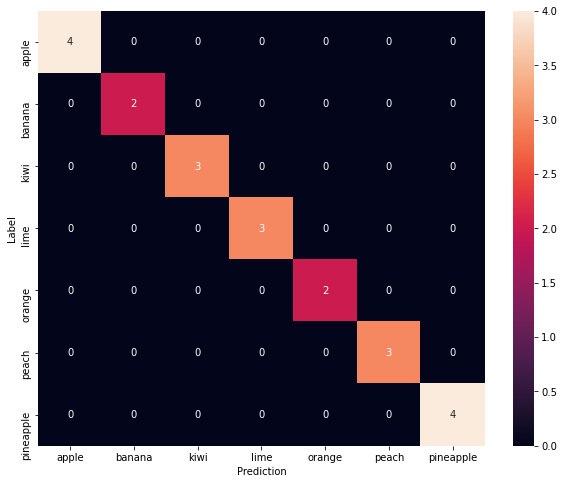

In [13]:
import seaborn as sns
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=words, yticklabels=words, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [14]:

from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

print('Accuracy Score :',accuracy_score(y_true, y_pred)*100 )
print('Report : ')
print(classification_report(y_true, y_pred, target_names= words))

Accuracy Score : 100.0
Report : 
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         4
      banana       1.00      1.00      1.00         2
        kiwi       1.00      1.00      1.00         3
        lime       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         2
       peach       1.00      1.00      1.00         3
   pineapple       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

